<a href="https://colab.research.google.com/github/kshitizs11/CIFAR10_Deep_Learning_Challenge/blob/master/Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import cifar10
import pandas as pd

In [ ]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def drawImg(img):
  plt.imshow(img.reshape(32,32,3))
  plt.show()

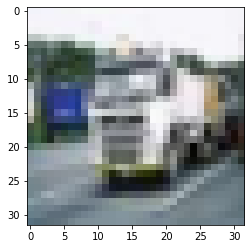

In [ ]:
drawImg(X_train[1000])

In [ ]:
y_train[450]

array([5], dtype=uint8)

# CNN 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3) ,activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=128, kernel_size=(3,3) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256, kernel_size=(3,3) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 256)         0

In [ ]:
y_test = to_categorical(y_test)
y_train  = to_categorical(y_train)

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1, 32,32, 3)

In [ ]:
hist = model.fit(X_train, y_train, batch_size=64, epochs = 75, validation_split=0.2)

Epoch 1/75
625/625 [==============================] - 37s 28ms/step - loss: 8.8292 - accuracy: 0.1287 - val_loss: 2.0669 - val_accuracy: 0.2452
Epoch 2/75
625/625 [==============================] - 17s 27ms/step - loss: 2.1221 - accuracy: 0.1955 - val_loss: 1.8120 - val_accuracy: 0.3260
Epoch 3/75
625/625 [==============================] - 17s 27ms/step - loss: 1.9195 - accuracy: 0.2759 - val_loss: 1.5785 - val_accuracy: 0.4393
Epoch 4/75
625/625 [==============================] - 17s 27ms/step - loss: 1.7158 - accuracy: 0.3595 - val_loss: 1.4492 - val_accuracy: 0.4853
Epoch 5/75
625/625 [==============================] - 17s 27ms/step - loss: 1.5789 - accuracy: 0.4212 - val_loss: 1.3455 - val_accuracy: 0.5301
Epoch 6/75
625/625 [==============================] - 17s 27ms/step - loss: 1.4838 - accuracy: 0.4592 - val_loss: 1.2679 - val_accuracy: 0.5561
Epoch 7/75
625/625 [==============================] - 17s 27ms/step - loss: 1.3884 - accuracy: 0.4959 - val_loss: 1.1891 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8159 - accuracy: 0.8017


[0.8159154057502747, 0.8016999959945679]